In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab
import glob, os
import scipy.stats as stats
from scipy.stats import gaussian_kde
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import timeit
%matplotlib inline

In [2]:
# Format to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# options of samples

In [3]:
df_train = pd.read_csv(r'R:/Angela/fast_trips/internal dataset/SF_90_df_train.csv')
df_test = pd.read_csv(r'R:/Angela/fast_trips/internal dataset/SF_90_df_test.csv')

how much is the record? 

In [4]:
print len(df_train)+len(df_test)

266817


2012 Fall data

# Build multi-linear regression model

# Model  - without vehicle IDs 

In [5]:
X2_train = df_train[['ON','OFF','Floor','three_doors','Express','OWL',
                     'on_threedoors','off_threedoors','on_floor','off_floor',
                     'on_express','off_express','on_rapid','off_rapid',
                     'on_owl','off_owl', 'friction']]

X2_test = df_test[['ON','OFF','Floor','three_doors','Express','OWL',
                   'on_threedoors','off_threedoors','on_floor','off_floor',
                   'on_express','off_express','on_rapid','off_rapid',
                   'on_owl','off_owl', 'friction']]

y2_train = df_train['COMPUTE_DOORDWELL']
y2_test = df_test['COMPUTE_DOORDWELL']

In [6]:
lm2 = LinearRegression()
lm2.fit(X2_train, y2_train)
pred2_train = lm2.predict(X2_train)
pred2_test = lm2.predict(X2_test)
LinearRegression(copy_X=True, fit_intercept=True,normalize=False)

# Construct a data frame that contains features and estimated coefficients
sklearn_results2 = pd.DataFrame(zip(X2_train.columns, lm2.coef_), columns = ['features', 'estimatedCoefficients'])
# p-values
scores, pvalues = chi2(X2_train, y2_train)
sklearn_results2['pvalues'] = pd.DataFrame(pvalues)
sklearn_results2['scores'] = pd.DataFrame(scores)

In [7]:
print sklearn_results2

          features  estimatedCoefficients  pvalues     scores
0               ON                  2.082    0.000 188285.632
1              OFF                  1.402    0.000  89961.126
2            Floor                 -2.480    0.000   3576.584
3      three_doors                  1.539    0.000   1889.599
4          Express                 -1.089    0.000    377.890
5              OWL                 -1.080    0.000    327.130
6    on_threedoors                 -0.531    0.000  87729.875
7   off_threedoors                 -0.422    0.000  50408.303
8         on_floor                 -0.193    0.000  30864.325
9        off_floor                 -0.191    0.000  13112.981
10      on_express                 -0.279    0.000  10722.390
11     off_express                 -0.250    0.000  10668.446
12        on_rapid                  0.005    0.000  54313.387
13       off_rapid                 -0.088    0.000  33279.599
14          on_owl                  0.585    0.000    439.109
15      

In [8]:
#sklearn_results2.to_csv('R:/Angela/fast_trips/muni_apc_2015/passenger_var_datasets_withoutVeh_6day_absOnOff_03082016.csv')

In [9]:
# R-square
R22 = r2_score(y2_train, pred2_train) 
print R22

0.255168227877


In [10]:
lm2.intercept_

10.771759927816797

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      COMPUTE_DOORDWELL   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3763.
Date:                Thu, 04 Aug 2016   Prob (F-statistic):               0.00
Time:                        17:00:16   Log-Likelihood:            -7.3709e+05
No. Observations:              186726   AIC:                         1.474e+06
Df Residuals:                  186708   BIC:                         1.474e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             10.7718      0.062    172.383      0.000        10.649    10.894
ON                 2.0821      0.016    132.497      0.000         2.051     2.113
OFF                1.4025      0.017     84.367      0.000         1.370     1.435
Floor             -2.4803      0.096    -25.921      0.000        -2.668    -2.293
three_doors        1.5389      0.107     14.375      0.000         1.329     1.749
Express           -1.0885      0.220     -4.940      0.000        -1.520    -0.657
OWL               -1.0796      0.604     -1.789      0.074        -2.263     0.103
on_threedoors     -0.5309      0.024    -22.333      0.000        -0.577    -0.484
off_threedoors    -0.4224      0.024    -17.479      0.000        -0.470    -0.375
on_floor          -0.1934      0.024     -8.055      0.000        -0.240    -0.146
off_floor         -0.1912      0.024     -7.863      0.000        -0.239    -0.144
on_express        -0.2792      0.039     -7.111      0.000        -0.356    -0.202
off_express       -0.2505      0.033     -7.624      0.000        -0.315    -0.186
on_rapid           0.0054      0.024      0.224      0.822        -0.042     0.052
off_rapid         -0.0883      0.024     -3.681      0.000        -0.135    -0.041
on_owl             0.5851      0.252      2.325      0.020         0.092     1.078
off_owl            0.7423      0.214      3.476      0.001         0.324     1.161
friction           0.0589      0.006      9.530      0.000         0.047     0.071
==============================================================================
Omnibus:                    96707.910   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           681109.928
Skew:                           2.442   Prob(JB):                         0.00
Kurtosis:                      10.981   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Computing prediction dwell time 

In [15]:
df_test.columns

Index([u'Unnamed: 0', u'ON', u'OFF', u'VEHNO', u'ANAME', u'STOPA', u'YR',
       u'HR', u'MIN', u'SEC',
       ...
       u'8743_5', u'8744_1', u'8744_4', u'8744_5', u'8744_6', u'8745_4',
       u'8746_1', u'8746_4', u'8746_5', u'8750_1'],
      dtype='object', length=986)

In [16]:
X_obser = df_test[['ON','OFF','Floor','three_doors','Express','OWL',
                     'on_threedoors','off_threedoors','on_floor','off_floor',
                     'on_express','off_express','on_rapid','off_rapid',
                     'on_owl','off_owl', 'friction']]
y_obser = df_test['COMPUTE_DOORDWELL']

y_pred = lm2.predict(X_obser)

In [17]:
print len(X_obser)
print len(y_obser)
print len(y_pred)

80091
80091
80091


In [18]:
data_table = X_obser

In [19]:
data_table['COMPUTE_DOORDWELL'] = y_obser

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
# Remind: I didn't use this value! 
y_pred2 = y_pred - 2
print y_pred
print y_pred2

[ 12.1742155   14.97912666  20.5025875  ...,  18.46367523  16.38158223
  16.38158223]
[ 10.1742155   12.97912666  18.5025875  ...,  16.46367523  14.38158223
  14.38158223]


In [20]:
# I still use the original prediction value as the y0
data_table['predicted_doordwell'] = y_pred

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
len(data_table)

80091

In [21]:
data_table['OBJ_ID'] = data_table.index

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
data_table.to_csv(r'C:\Users\Angela\Documents\GitHub\fast-trips_dwell_time_model\SF_model_obs_pred.csv')

In [21]:
data_table.columns

Index([u'ON', u'OFF', u'Floor', u'three_doors', u'Express', u'OWL',
       u'on_threedoors', u'off_threedoors', u'on_floor', u'off_floor',
       u'on_express', u'off_express', u'on_rapid', u'off_rapid', u'on_owl',
       u'off_owl', u'friction', u'COMPUTE_DOORDWELL', u'predicted_doordwell'],
      dtype='object')

In [22]:
data_table.head()

,ON,OFF,Floor,three_doors,Express,OWL,on_threedoors,off_threedoors,on_floor,off_floor,on_express,off_express,on_rapid,off_rapid,on_owl,off_owl,friction,COMPUTE_DOORDWELL,predicted_doordwell
0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,13,12.174
1,0,3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16,14.979
2,4,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18,20.503
3,0,3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8,14.979
4,7,2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,69,28.151


# Visual model results: Observation v.s. Prediction

Here is an external process:
apply excel to produce the TCQSM prediction on newly data, which was just procuded in the previous model

In [48]:
# Calculate the point density
def density_plot(x_column, y_column, x_title, y_title, figure_title):
    x2 = my_data[x_column]
    y2 = my_data[y_column]
    
    start = timeit.default_timer()
    xy2 = np.vstack([x2,y2])
    z2 = gaussian_kde(xy2)(xy2)
    stop = timeit.default_timer()
    print 'z:', stop - start
    # Sort the points by density, so that the densest points are plotted last
    start = timeit.default_timer()
    idx = z2.argsort()
    stop = timeit.default_timer()
    print 'sort data:', stop - start    
    
    x2, y2, z2 = x2[idx], y2[idx], z2[idx]
    fig, ax = plt.subplots()
    ax.scatter(x2, y2, c=z2, s=5, edgecolor='')
    
    x2 = np.linspace(*ax.get_xlim()) 
    ax.plot(x2, x2) 
    ax.plot(x2, 0.8*x2)
    ax.plot(x2, 1.2*x2)
    
    plt.axis([0, 100, 0, 100])
    #plt.title('SF dwell time model : scatter plot colored by density')
    plt.title(figure_title)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    
    plt.tight_layout()
    #plt.figure(figsize=(10,5))
    pylab.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.show()

In [46]:
x_column = 'COMPUTE_DOORDWELL'
y_column = 'predicted_doordwell'
x_title = 'Observation'
y_title = 'Prediction'
figure_title = 'SF Muni dwell time'

z: 222.968292304
sort data: 0.00620835838777


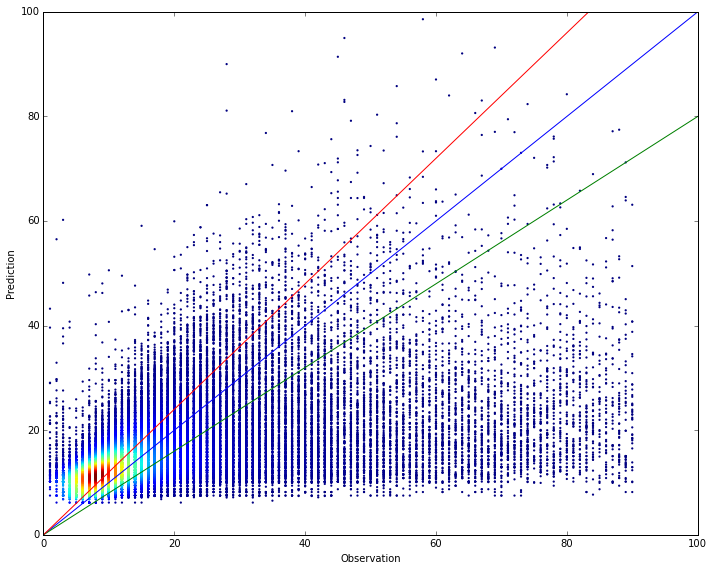

In [47]:
density_plot(x_column, y_column, x_title, y_title)

try to shift the red spot to y=x line

In [56]:
my_data['predicted_doordwell_inter_3sec'] = my_data['predicted_doordwell'] - 3

In [57]:
x_column = 'COMPUTE_DOORDWELL'
y_column = 'predicted_doordwell_inter_3sec'
x_title = 'Observation'
y_title = 'Prediction'
main_title = 'SF Muni dwell time (intercept -3 seconds)'

z: 220.954342742
sort data: 0.00515637564922


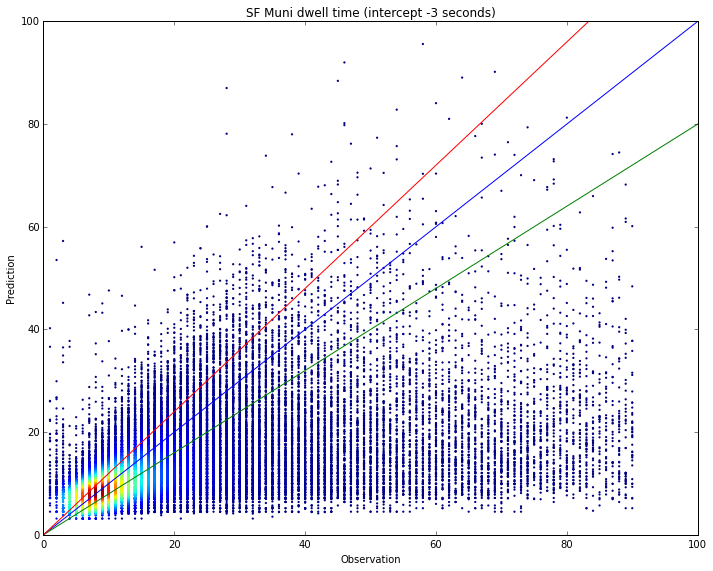

In [58]:
density_plot(x_column, y_column, x_title, y_title, main_title)

# Correlation table

find the top correlations in a correlation matrix with Pandas

In [51]:
c2 = X2_train.corr().abs()
s2 = c2.unstack()
so2 = s2.order(kind="quicksort")

In [52]:
print len(so2)
soo2 = so2.dropna()
soo2 = soo2[soo2 >= 0.500]
soo2 = soo2[soo2 != 1.0]
print len(soo2)

324
24


In [53]:
soo2

Floor           on_floor         0.504
on_floor        Floor            0.504
Floor           off_floor        0.510
off_floor       Floor            0.510
Express         off_express      0.521
off_express     Express          0.521
three_doors     on_threedoors    0.538
on_threedoors   three_doors      0.538
three_doors     off_threedoors   0.557
off_threedoors  three_doors      0.557
Express         on_express       0.569
on_express      Express          0.569
off_threedoors  OFF              0.570
OFF             off_threedoors   0.570
ON              on_threedoors    0.574
on_threedoors   ON               0.574
OWL             off_owl          0.598
off_owl         OWL              0.598
Rapid           on_rapid         0.616
on_rapid        Rapid            0.616
off_rapid       Rapid            0.633
Rapid           off_rapid        0.633
on_owl          OWL              0.640
OWL             on_owl           0.640
dtype: float64

# Validation Plots with 2012 Fall day

In [40]:
X3_test = oneday_fall12[['ON','OFF','Floor','three_doors','Express','OWL',
                   'on_threedoors','off_threedoors','on_floor','off_floor',
                   'on_express','off_express','on_rapid','off_rapid',
                   'on_owl','off_owl', 'friction']]

y3_test = oneday_fall12['COMPUTE_DOORDWELL']

In [41]:
X2_test = df_test[['ON','OFF','Floor','three_doors','Express','OWL',
                   'on_threedoors','off_threedoors','on_floor','off_floor',
                   'on_express','off_express','on_rapid','off_rapid',
                   'on_owl','off_owl', 'friction']]

y2_test = df_test['COMPUTE_DOORDWELL']

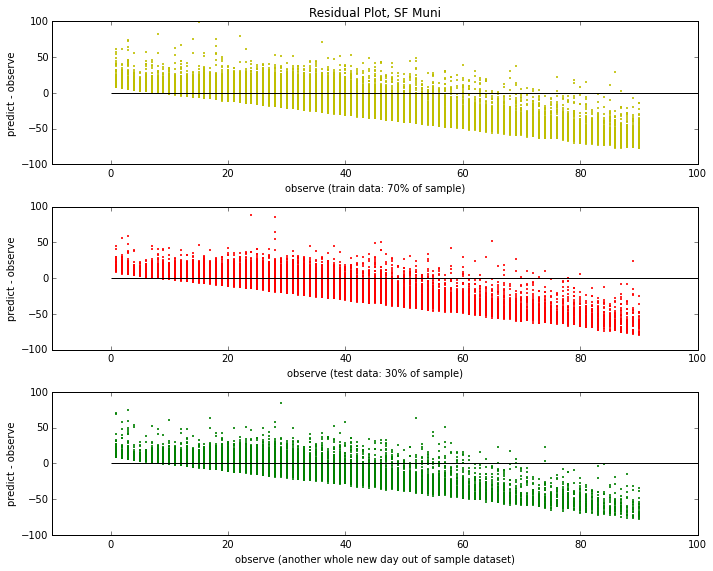

In [58]:
plt.figure(1)
plt.subplot(311)
plt.scatter(y2_train, lm2.predict(X2_train) - y2_train, c='y', s=1,edgecolor='y')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-10, 100, -100, 100])
plt.title('Residual Plot, SF Muni')
plt.ylabel('predict - observe')
plt.xlabel('observe (train data: 70% of sample)')

plt.subplot(312)
plt.scatter(y2_test, lm2.predict(X2_test) - y2_test, c='r', s=1,edgecolor='r')
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-10, 100, -100, 100])
plt.ylabel('predict - observe')
plt.xlabel('observe (test data: 30% of sample)')

plt.subplot(313)
plt.scatter(y3_test, lm2.predict(X3_test) - y3_test, c='g', s=1,edgecolor='g')

plt.tight_layout()
plt.hlines(y=0, xmin=0, xmax=120)
plt.axis([-10, 100, -100, 100])
plt.ylabel('predict - observe')
plt.xlabel('observe (another whole new day out of sample dataset)')

plt.tight_layout()
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()

z: 231.648571446
sort data: 0.0052381829214


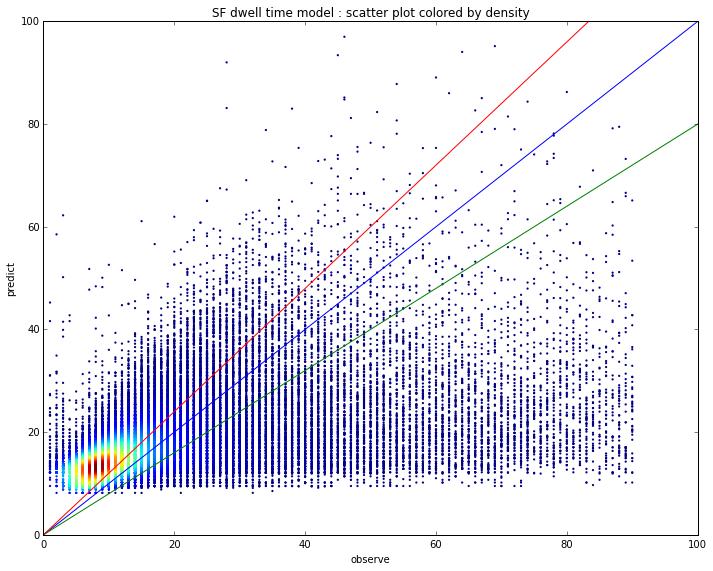

In [204]:
x2 = y2_test
y2 = lm2.predict(X2_test)

# Calculate the point density
start = timeit.default_timer()
xy2 = np.vstack([x2,y2])
z2 = gaussian_kde(xy2)(xy2)
stop = timeit.default_timer()
print 'z:', stop - start

# Sort the points by density, so that the densest points are plotted last
start = timeit.default_timer()
idx = z2.argsort()
stop = timeit.default_timer()
print 'sort data:', stop - start

x2, y2, z2 = x2[idx], y2[idx], z2[idx]
fig, ax = plt.subplots()
ax.scatter(x2, y2, c=z2, s=5, edgecolor='')

x2 = np.linspace(*ax.get_xlim()) 
ax.plot(x2, x2) 
ax.plot(x2, 0.8*x2)
ax.plot(x2, 1.2*x2)


plt.axis([0, 100, 0, 100])
plt.title('SF dwell time model : scatter plot colored by density')
plt.ylabel('predict')
plt.xlabel('observe')

plt.tight_layout()
plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.show()


In [208]:
y_pred

array([ 12.1742155 ,  14.97912666,  20.5025875 , ...,  18.46367523,
        16.38158223,  16.38158223])

In [209]:
y2

array([ 112.24422165,  121.78053575,  117.22144947, ...,   13.13659178,
         13.13659178,   13.12836306])

In [210]:
y_obser

0        13
1        16
2        18
3         8
4        69
5        10
6        41
7        16
8         6
9        27
10       17
11       22
12        7
13       24
14       16
15       18
16        7
17       41
18       18
19       21
20       11
21       38
22       16
23       15
24       16
25       12
26       17
27       25
28       10
29        9
         ..
80061    43
80062     9
80063    26
80064    13
80065    37
80066    14
80067     6
80068     6
80069     5
80070     4
80071     5
80072    14
80073     7
80074     6
80075    11
80076    11
80077    10
80078    28
80079    16
80080     6
80081    17
80082     9
80083     9
80084    12
80085    16
80086     9
80087    19
80088    15
80089    13
80090    23
Name: COMPUTE_DOORDWELL, dtype: int64

# Trend line plot

In [61]:
df_test['on+off'] = df_test['ON'] + df_test['OFF']
X3_test = df_test[['ON','OFF','on+off', 'Floor','three_doors',
                   'Express','OWL','Rapid','on_threedoors','off_threedoors',
                   'on_floor','off_floor','on_express','off_express',
                   'on_rapid','off_rapid','on_owl','off_owl', 'friction']]

In [62]:
df_est = []
df_est = pd.DataFrame(lm3.predict(X3_test), index = X3_test.index, columns = ['Dwell_Time_Esti'])
test = pd.concat([X3_test, df_est], axis=1, join='inner')
test.head()

,ON,OFF,on+off,Floor,three_doors,Express,OWL,Rapid,on_threedoors,off_threedoors,on_floor,off_floor,on_express,off_express,on_rapid,off_rapid,on_owl,off_owl,friction,Dwell_Time_Esti
19,1,1,2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,14.562
37,1,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.918
56,1,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,12.918
59,3,2,5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,20.932
61,5,0,5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.367


In [63]:
test_artic = test[test.three_doors == 1]
test_std = test[test.three_doors == 0]
test_low = test[test.Floor == 1]
test_exp = test[test.Express == 1]
test_rapid = test[test.Rapid == 1]
test_owl = test[test.OWL == 1]
test_local = test[(test.Express != 1) & (test.OWL != 1) & (test.Rapid != 1)]

19996 19996


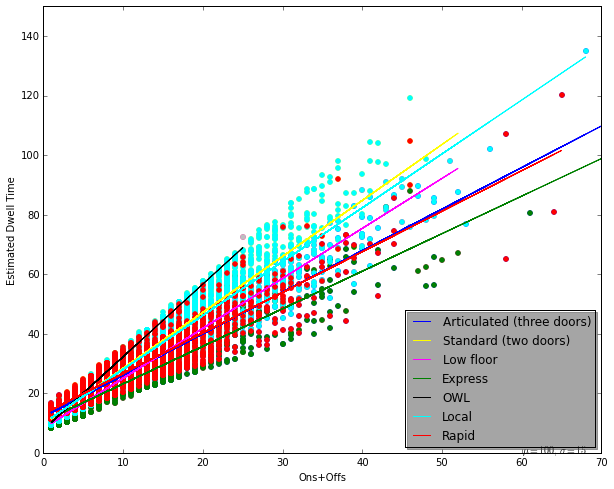

In [65]:
fig, ax = plt.subplots()

# Articulated bus
x1 = test_artic['on+off']
y1 = test_artic['Dwell_Time_Esti']
print len(x1), len(y1)
# plot the data itself
ax.scatter(x1, y1, color = 'blue')
#plot the trend line
fit = np.polyfit(x1, y1, deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color='blue', label='Articulated (three doors)')

#Standard bus
x2 = test_std['on+off']
y2 = test_std['Dwell_Time_Esti']
ax.scatter(x2, y2, color = 'yellow')
fit = np.polyfit(x2, y2, deg=1)
ax.plot(x2, fit[0] * x2 + fit[1], color='yellow', label='Standard (two doors)')

#Low floor
x7 = test_low['on+off']
y7 = test_low['Dwell_Time_Esti']
ax.scatter(x7, y7, color = 'magenta')
fit = np.polyfit(x7, y7, deg=1)
ax.plot(x7, fit[0] * x7 + fit[1], color='magenta', label= 'Low floor')

#Express
x4 = test_exp['on+off']
y4 = test_exp['Dwell_Time_Esti']
ax.scatter(x4, y4, color = 'green')
fit = np.polyfit(x4, y4, deg=1)
ax.plot(x4, fit[0] * x4 + fit[1], color='green', label= 'Express')

#OWL
x5 = test_owl['on+off']
y5 = test_owl['Dwell_Time_Esti']
ax.scatter(x5, y5, color = '0.75')
fit = np.polyfit(x5, y5, deg=1)
ax.plot(x5, fit[0] * x5 + fit[1], color='black', label= 'OWL')

#Local
x6 = test_local['on+off']
y6 = test_local['Dwell_Time_Esti']
ax.scatter(x6, y6, color = 'cyan')
fit = np.polyfit(x6, y6, deg=1)
ax.plot(x6, fit[0] * x6 + fit[1], color='cyan', label= 'Local')

#Rapid
x8 = test_rapid['on+off']
y8 = test_rapid['Dwell_Time_Esti']
ax.scatter(x8, y8, color = 'red')
fit = np.polyfit(x8, y8, deg=1)
ax.plot(x8, fit[0] * x8 + fit[1], color='red', label= 'Rapid')

plt.xlabel('Ons+Offs')
plt.ylabel('Estimated Dwell Time')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
ax.legend(loc='lower right', shadow=True)
#plt.figure(figsize=(10,5))
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.axis([0, 70, 0, 150])

fig.show()

#three doors trend is exactly as same as rapid ride bus... 

In [57]:
print 'Congrats! go get a bear at Fishermans Wharf'

end
